In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scripts.forest import Forest
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import scripts.timeseries as ts
import pandas as pd
import time
import scipy.io as sio
from sklearn import metrics
import rrcf
import h5py

In [2]:
dataset = 'thyroid'
trials = 1
run_lof_svm = 1
mat_data = sio.loadmat('../data/'+dataset+'.mat')
X = mat_data['X']
t = X[0,0]
newdir = 'pidtrials/'
if not os.path.exists(newdir):
    os.makedirs(newdir)
file_name = newdir + dataset + '.txt'
File_object = open(file_name,"w")   
print(X.shape)

(7200, 6)


In [3]:
trials = 1
time_all = np.zeros((trials,1))
precision_all = np.zeros((trials,1))
auc_all = np.zeros((trials,1))
start = time.time()   # to measure time needed ?! :o   cool
t1, _ = np.shape(X)
n_samples = 100
kwargs = {'max_depth': 10, 'n_trees':50,  'max_samples': n_samples, 'max_buckets': 3, 'epsilon': 0.1, 'sample_axis': 1, 
  'threshold': 0}
forest = Forest(**kwargs)  #wo pidforest ufgruefe wird ;)
forest.fit(np.transpose(X))
indices, outliers, scores , pst, our_scores = forest.predict(np.transpose(X), err = 0.1, pct=50) #oki and this gives us anomalous data/score?
end = time.time()
time_all[0,0] = end - start

In [4]:
y = mat_data['y']
precision_our, recall_our, thresholds_our = metrics.precision_recall_curve(y, -our_scores, pos_label=1)
precision_all[0,0] = max(2*precision_our*recall_our/(precision_our+recall_our))
auc_all[0,0] = metrics.roc_auc_score(y, -our_scores)
File_object.write(str(kwargs))

/var/folders/x5/mwcfdcrn1xb05dbsm5_wdgfw0000gn/T/ipykernel_4049/81227087.py:3: RuntimeWarning: invalid value encountered in divide
  precision_all[0,0] = max(2*precision_our*recall_our/(precision_our+recall_our))


120

In [ ]:
#print(our_scores[5416])

In [ ]:
#print(pst[5416])

In [ ]:
#print(pst[5416].shape)

In [ ]:
#print(np.shape(X))

In [5]:
j = 0
File_object.write('\n\tOur-Algo\n\n')    

File_object.write('{:.4f}\t'.format( precision_all[j,0] ))
File_object.write('\n')
    
File_object.write('\n')   
    
File_object.write('{:.4f}\t'.format( np.mean(precision_all[:,0]) ))
File_object.write('\n')   

File_object.write('{:.4f}\t'.format( np.std(precision_all[:,0]) ))
File_object.write('\n')

File_object.write('\tOur-Algo\n\n')    
    
File_object.write('{:.4f}\t'.format( auc_all[j,0] ))
File_object.write('\n')
    
File_object.write('\n') 
    
File_object.write('{:.4f}\t'.format( np.mean(auc_all[:,0]) ))
File_object.write('\n')    

File_object.write('{:.4f}\t'.format( np.std(auc_all[:,0]) ))
File_object.write('\n')
    
File_object.close()

file_name = newdir + dataset + '_results.mat'
sio.savemat(file_name, {'time_all':time_all, 'precision_all':precision_all, 'auc_all':auc_all})

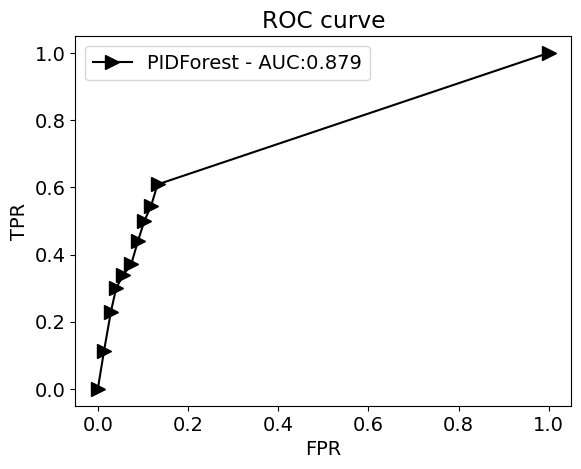

In [6]:
X = np.float_(X)
[n,d] = np.shape(X)

n_samples = 100
f = plt.figure()
plt.rcParams.update({'font.size': 14})
forest = Forest(**kwargs)
forest.fit(np.transpose(X))
indices, outliers, scores , pst, alg_scores = forest.predict(np.transpose(X), err = 0.1, pct=50)
alg_scores = - alg_scores
fpr_alg, tpr_alg, thresholds_alg = metrics.roc_curve(y, alg_scores, pos_label=1)
#plt.plot(fpr_alg,tpr_alg, 'b')
thresh_len = len(fpr_alg)
sample_thresh = np.int_( [k * thresh_len/30 for k in range(10)] )
sample_thresh = np.concatenate( [sample_thresh, np.asarray([thresh_len-1]) ])
auc_all[0,0] = metrics.roc_auc_score(y, alg_scores)
plt.plot(fpr_alg[sample_thresh],tpr_alg[sample_thresh], c = 'k', marker = ">", markersize=10, label= f'PIDForest - AUC:{auc_all[0,0]:.3f}')

file_name = newdir + dataset + ' trial '+str(j+1)+'.pdf'
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.title('ROC curve')
plt.show()
f.savefig(file_name, bbox_inches='tight')

file_name = newdir + dataset + '_results_plot.mat'
sio.savemat(file_name, {'auc_all':auc_all})

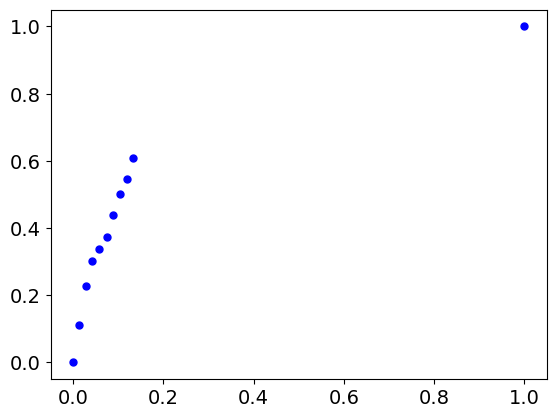

In [7]:
plt.scatter(fpr_alg[sample_thresh],tpr_alg[sample_thresh], c = 'b', marker = ".", s=100, label='PIDForest')